# Sesgos Semánticos: Embeddings vs Léxico

**Notebook:** Comparación de sesgos basados en embeddings  
**Versión:** 1.0  
**Fecha:** Diciembre 2025

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nicolakorff/tfm-endocrine-llm/blob/main/examples/03_demo_semantic.ipynb)

---

Este notebook demuestra el uso de **sesgos semánticos** basados en Sentence-BERT que afectan ~1000 tokens vs ~15 del sesgo léxico simple.

**Contenido:**
1. Instalación (con características semánticas)
2. Comparación directa: Sesgo simple vs semántico
3. Análisis de activación semántica
4. Categorías semánticas predefinidas
5. Crear categorías custom
6. Análisis cuantitativo

##1. Instalación

Instalar con características semánticas (incluye sentence-transformers)

In [1]:
# Instalar con semantic features
!pip install -q "git+https://github.com/Nicolakorff/tfm-endocrine-llm.git@v0.4.0"

# Verificar instalación
import endocrine_llm
print(f"Versión: {endocrine_llm.__version__}")

# Verificar que semantic está disponible
try:
    from endocrine_llm.semantic import SemanticBiasManager
    print("Módulo semántico disponible")
except ImportError:
    print("ERROR: Módulo semántico no disponible")
    print("Reinstala con: pip install endocrine-llm[semantic]")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.1 MB/s eta 0:00:00


Versión: 0.4.0
Módulo semántico disponible


##2. Imports

In [2]:
from endocrine_llm import EndocrineModulatedLLM, HORMONE_PROFILES
from endocrine_llm.semantic import SemanticBiasManager, analyze_semantic_activation
import warnings
warnings.filterwarnings('ignore')

# Cargar modelo
print("Cargando modelo...")
model = EndocrineModulatedLLM("distilgpt2")
print(f"Modelo cargado en: {model.device}")

Cargando modelo...
Inicializando EndocrineModulatedLLM
Modelo: distilgpt2
   Dispositivo: cpu


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Sistema inicializado
Parámetros: 81.9M
Tokens empáticos: 34
Modelo cargado en: cpu


In [13]:
# Inicializar manager semántico
manager = SemanticBiasManager(model.tokenizer, device=model.device)

 Cargando modelo de embeddings: all-MiniLM-L6-v2...
   Computing category embeddings...
 SemanticBiasManager inicializado
   Categorías disponibles: ['empathy', 'creativity', 'factual', 'caution', 'enthusiasm']


##3. ¿Qué son los Sesgos Semánticos?

| Característica | Sesgo Léxico | Sesgo Semántico |
|----------------|--------------|------------------|
| **Cobertura** | ~15 tokens | ~1000 tokens |
| **Base** | Lista fija | Embeddings SBERT |
| **Flexibilidad** | Estática | Dinámica |
| **Costo** | Bajo | Moderado |

### Ejemplo Visual:

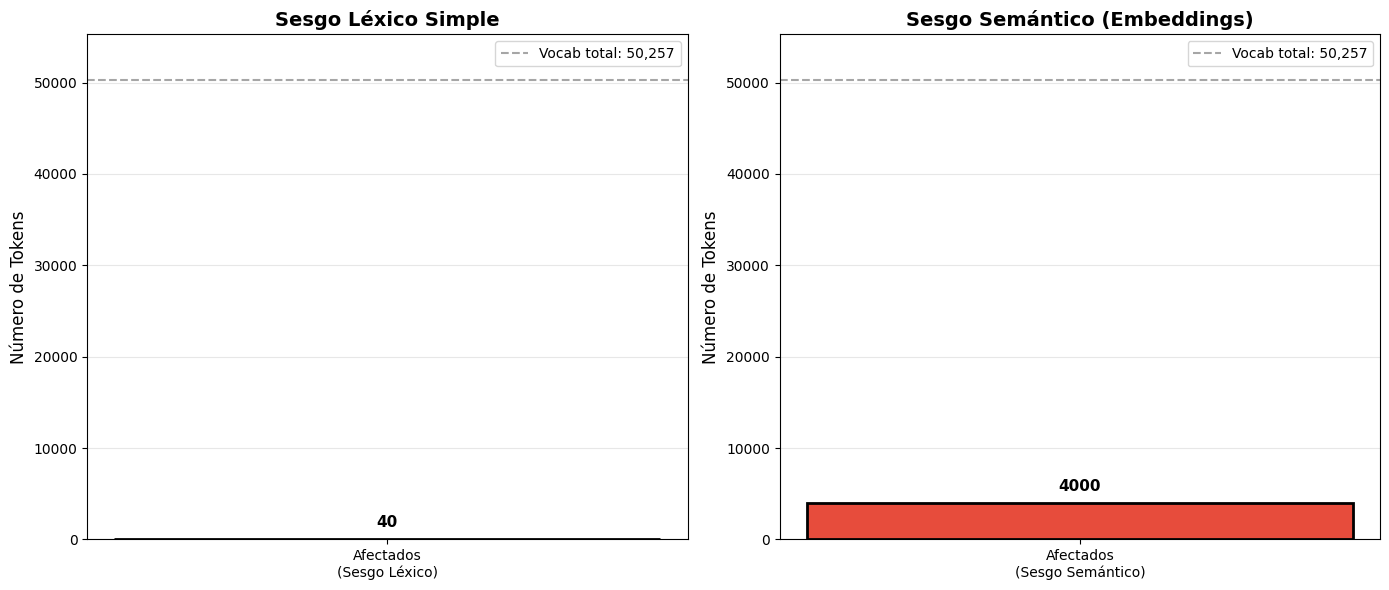


COMPARACIÓN DE COBERTURA
Vocabulario total GPT-2:     50,257 tokens
Sesgo léxico (lista manual):     40 tokens (0.080%)
Sesgo semántico (embeddings): 4,000 tokens (7.96%)

Ratio de cobertura:        100.0×
   El enfoque semántico cubre 3,960 tokens adicionales


In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Configuración
vocab_size = 50257
simple_affected = 40
semantic_affected = 4000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# === Opción 1: Enfoque en tokens afectados con referencia ===
# Panel izquierdo - Sesgo Léxico
ax1.bar(['Afectados\n(Sesgo Léxico)'], [simple_affected],
        color='#3498db', edgecolor='black', linewidth=2, width=0.5)
ax1.axhline(y=vocab_size, color='gray', linestyle='--',
            linewidth=1.5, alpha=0.7, label=f'Vocab total: {vocab_size:,}')
ax1.set_ylabel('Número de Tokens', fontsize=12)
ax1.set_title('Sesgo Léxico Simple', fontsize=14, fontweight='bold')
ax1.set_ylim([0, vocab_size * 1.1])
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(axis='y', alpha=0.3)
# Añadir anotación del valor
ax1.text(0, simple_affected + vocab_size * 0.02, f'{simple_affected}',
         ha='center', va='bottom', fontsize=11, fontweight='bold')

# Panel derecho - Sesgo Semántico
ax2.bar(['Afectados\n(Sesgo Semántico)'], [semantic_affected],
        color='#e74c3c', edgecolor='black', linewidth=2, width=0.5)
ax2.axhline(y=vocab_size, color='gray', linestyle='--',
            linewidth=1.5, alpha=0.7, label=f'Vocab total: {vocab_size:,}')
ax2.set_ylabel('Número de Tokens', fontsize=12)
ax2.set_title('Sesgo Semántico (Embeddings)', fontsize=14, fontweight='bold')
ax2.set_ylim([0, vocab_size * 1.1])
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)
# Añadir anotación del valor
ax2.text(0, semantic_affected + vocab_size * 0.02, f'{semantic_affected}',
         ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Estadísticas comparativas
print(f"\nCOMPARACIÓN DE COBERTURA")
print(f"{'='*50}")
print(f"Vocabulario total GPT-2:     {vocab_size:>6,} tokens")
print(f"Sesgo léxico (lista manual): {simple_affected:>6,} tokens ({simple_affected/vocab_size*100:.3f}%)")
print(f"Sesgo semántico (embeddings):{semantic_affected:>6,} tokens ({semantic_affected/vocab_size*100:.2f}%)")
print(f"\nRatio de cobertura:        {semantic_affected / simple_affected:.1f}×")
print(f"   El enfoque semántico cubre {semantic_affected - simple_affected:,} tokens adicionales")

##4. Comparación Directa: Simple vs Semántico

In [41]:
prompt = "I'm feeling overwhelmed and need support."

print("="*70)
print("COMPARACIÓN: SESGO SIMPLE VS SEMÁNTICO")
print("="*70)
print(f"\nPrompt: {prompt}\n")

# SESGO SIMPLE (léxico)
print("[SESGO SIMPLE - Lista de tokens]")
text_simple = model.generate_with_hormones(
    prompt,
    HORMONE_PROFILES["empathic"],
    max_new_tokens=50
)[0]
print(f"{text_simple}\n")

# SESGO SEMÁNTICO (embeddings)
print("[SESGO SEMÁNTICO - Embeddings]")
text_semantic = model.generate_with_semantic_bias(
    prompt,
    HORMONE_PROFILES["empathic"],
    semantic_category="empathy",
    semantic_strength=1.5,
    max_new_tokens=50
)[0]
print(f"{text_semantic}\n")
print("="*70)

COMPARACIÓN: SESGO SIMPLE VS SEMÁNTICO

Prompt: I'm feeling overwhelmed and need support.

[SESGO SIMPLE - Lista de tokens]
I'm feeling overwhelmed and need support.
I was talking to a friend of mine and a friend of mine who had died when the baby went into my apartment in a very strange place. The next day in another state, someone went into his apartment to get me to call his office at

[SESGO SEMÁNTICO - Embeddings]
   Pre-computing semantic bias for 'empathy'...
I'm feeling overwhelmed and need support. My doctor wants to see what my GP is telling me.

"As far as our GP, I didn't respond to one or two calls but we were the only ones to say we didn't understand the truth either."
Dr Ian E



##5. Calcular Métricas Comparativas

In [42]:
from endocrine_llm import TextMetrics

# Calcular métricas
metrics_simple = TextMetrics.compute_all(text_simple)
metrics_semantic = TextMetrics.compute_all(text_semantic)

print("COMPARACIÓN DE MÉTRICAS")
print("="*70)

metrics_to_show = [
    ('distinct_2', 'Diversidad Léxica'),
    ('repetition_rate', 'Tasa de Repetición'),
    ('sentiment_polarity', 'Polaridad del Sentimiento')
]

for metric_key, metric_name in metrics_to_show:
    simple_val = metrics_simple[metric_key]
    semantic_val = metrics_semantic[metric_key]
    diff = semantic_val - simple_val
    pct_change = (diff / simple_val * 100) if simple_val != 0 else 0

    print(f"\n{metric_name}:")
    print(f"Simple:    {simple_val:.4f}")
    print(f"Semántico: {semantic_val:.4f}  (Δ = {diff:+.4f}, {pct_change:+.1f}%)")

COMPARACIÓN DE MÉTRICAS

Diversidad Léxica:
Simple:    0.9231
Semántico: 1.0000  (Δ = +0.0769, +8.3%)

Tasa de Repetición:
Simple:    0.0392
Semántico: 0.0000  (Δ = -0.0392, -100.0%)

Polaridad del Sentimiento:
Simple:    -0.0325
Semántico: 0.1000  (Δ = +0.1325, -407.7%)


##6. Análisis de Activación Semántica

In [43]:
# Analizar texto generado con sesgo semántico
analysis = analyze_semantic_activation(text_semantic, manager)

print("ANÁLISIS DE ACTIVACIÓN SEMÁNTICA")
print("="*70)
print(f"\nTexto analizado: {text_semantic[:100]}...")
print(f"\nCategoría dominante: {analysis['dominant_category']}")
print(f"Score de activación: {analysis['dominant_score']:.3f}")

print("\nActivación por categoría:")
for cat, score in sorted(analysis['similarities'].items(), key=lambda x: -x[1]):
    bar = '█' * int(score * 20)
    print(f"  {cat:12s}: {score:.3f}  {bar}")

ANÁLISIS DE ACTIVACIÓN SEMÁNTICA

Texto analizado: I'm feeling overwhelmed and need support. My doctor wants to see what my GP is telling me.

"As far ...

Categoría dominante: empathy
Score de activación: 0.290

Activación por categoría:
  empathy     : 0.290  █████
  factual     : 0.175  ███
  caution     : 0.154  ███
  enthusiasm  : 0.110  ██
  creativity  : -0.056  


##7. Explorar Categorías Semánticas Predefinidas

In [44]:
# Categorías disponibles
categories = ['empathy', 'creativity', 'factual', 'caution', 'enthusiasm']

prompt = "Tell me about artificial intelligence."

print("="*70)
print("GENERACIÓN CON DIFERENTES CATEGORÍAS SEMÁNTICAS")
print("="*70)
print(f"\nPrompt: {prompt}\n")

for category in categories:
    texts = model.generate_with_semantic_bias(
        prompt,
        HORMONE_PROFILES["baseline"],
        semantic_category=category,
        semantic_strength=1.5,
        max_new_tokens=40
    )

    print(f"\n[{category.upper()}]")
    print("-"*70)
    print(texts[0])
    print("-"*70)

GENERACIÓN CON DIFERENTES CATEGORÍAS SEMÁNTICAS

Prompt: Tell me about artificial intelligence.

   Pre-computing semantic bias for 'empathy'...

[EMPATHY]
----------------------------------------------------------------------
Tell me about artificial intelligence.” I” And she didn't see. She kept his mind all day. And she wasn't interested in any artificial intelligence until it made the rounds on Twitter.


And he
----------------------------------------------------------------------
   Pre-computing semantic bias for 'creativity'...

[CREATIVITY]
----------------------------------------------------------------------
Tell me about artificial intelligence. My personal experience with artificial intelligence has taught me a bit of practical skill with AI. I am excited about it because the artificial intelligence is a lot more powerful than what I have ever been capable of.
----------------------------------------------------------------------
   Pre-computing semantic bias for 'factual

##8. Crear Categoría Semántica Custom

In [45]:
# Inicializar manager si no existe
if not hasattr(model, 'semantic_manager'):
    model.semantic_manager = SemanticBiasManager(
        model.tokenizer,
        device=model.device
    )

# Añadir categoría TECHNICAL
model.semantic_manager.add_custom_category(
    name="technical",
    examples=[
        "algorithm", "function", "variable", "code", "implementation",
        "optimize", "debug", "compile", "syntax", "framework",
        "architecture", "module", "class", "method", "parameter"
    ]
)

print("Categoría 'technical' añadida")

# Generar con categoría custom
text_technical = model.generate_with_semantic_bias(
    "Explain how hash tables work.",
    HORMONE_PROFILES["cautious"],
    semantic_category="technical",
    semantic_strength=2.0,
    max_new_tokens=60
)[0]

print("\nGeneración con categoría TECHNICAL:")
print("="*70)
print(text_technical)

 Categoría 'technical' añadida
Categoría 'technical' añadida
   Pre-computing semantic bias for 'technical'...

Generación con categoría TECHNICAL:
Explain how hash tables work.


##9. Efecto de Semantic Strength

EFECTO DE SEMANTIC_STRENGTH
Prompt: I need help.

   Pre-computing semantic bias for 'empathy'...

[Strength = 0.5]
----------------------------------------------------------------------
I need help. If it would be something we wanted to do better, I'm so glad she did and then if I can help it do something for her."



Activación empathy: 0.189
----------------------------------------------------------------------
   Pre-computing semantic bias for 'empathy'...

[Strength = 1.0]
----------------------------------------------------------------------
I need help.›
I do that every day at least once a day. This last night, for one lucky person, I ran for the seat. ›
Activación empathy: 0.214
----------------------------------------------------------------------
   Pre-computing semantic bias for 'empathy'...

[Strength = 1.5]
----------------------------------------------------------------------
I need help.※

This is a story about you and I’m going on on this one of my posts as someone wh

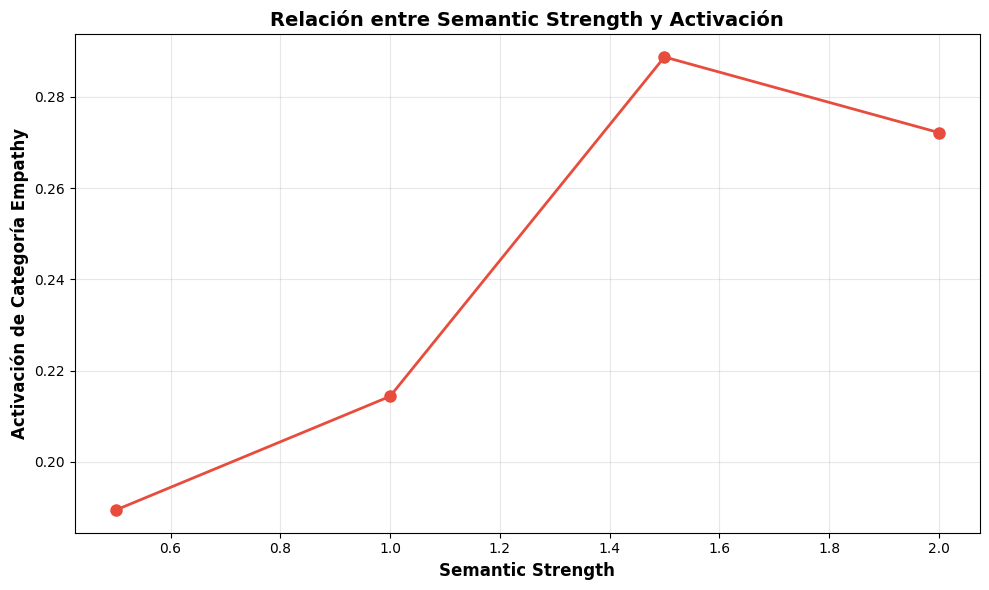

In [46]:
prompt = "I need help."
strengths = [0.5, 1.0, 1.5, 2.0]

print("EFECTO DE SEMANTIC_STRENGTH")
print("="*70)
print(f"Prompt: {prompt}\n")

activations = []

for strength in strengths:
    texts = model.generate_with_semantic_bias(
        prompt,
        HORMONE_PROFILES["empathic"],
        semantic_category="empathy",
        semantic_strength=strength,
        max_new_tokens=40
    )

    # Analizar activación
    analysis = analyze_semantic_activation(texts[0], manager)
    activations.append(analysis['similarities']['empathy'])

    print(f"\n[Strength = {strength}]")
    print("-"*70)
    print(texts[0])
    print(f"Activación empathy: {analysis['similarities']['empathy']:.3f}")
    print("-"*70)

# Visualizar relación
plt.figure(figsize=(10, 6))
plt.plot(strengths, activations, marker='o', linewidth=2, markersize=8, color='#e74c3c')
plt.xlabel('Semantic Strength', fontsize=12, fontweight='bold')
plt.ylabel('Activación de Categoría Empathy', fontsize=12, fontweight='bold')
plt.title('Relación entre Semantic Strength y Activación', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##10. Análisis Cuantitativo (Múltiples Generaciones)

Ejecutando análisis cuantitativo mejorado...
(Entre 3 y 5 minutos dependiendo de número de repeticiones y tokens)
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing semantic bias for 'empathy'...
   Pre-computing seman

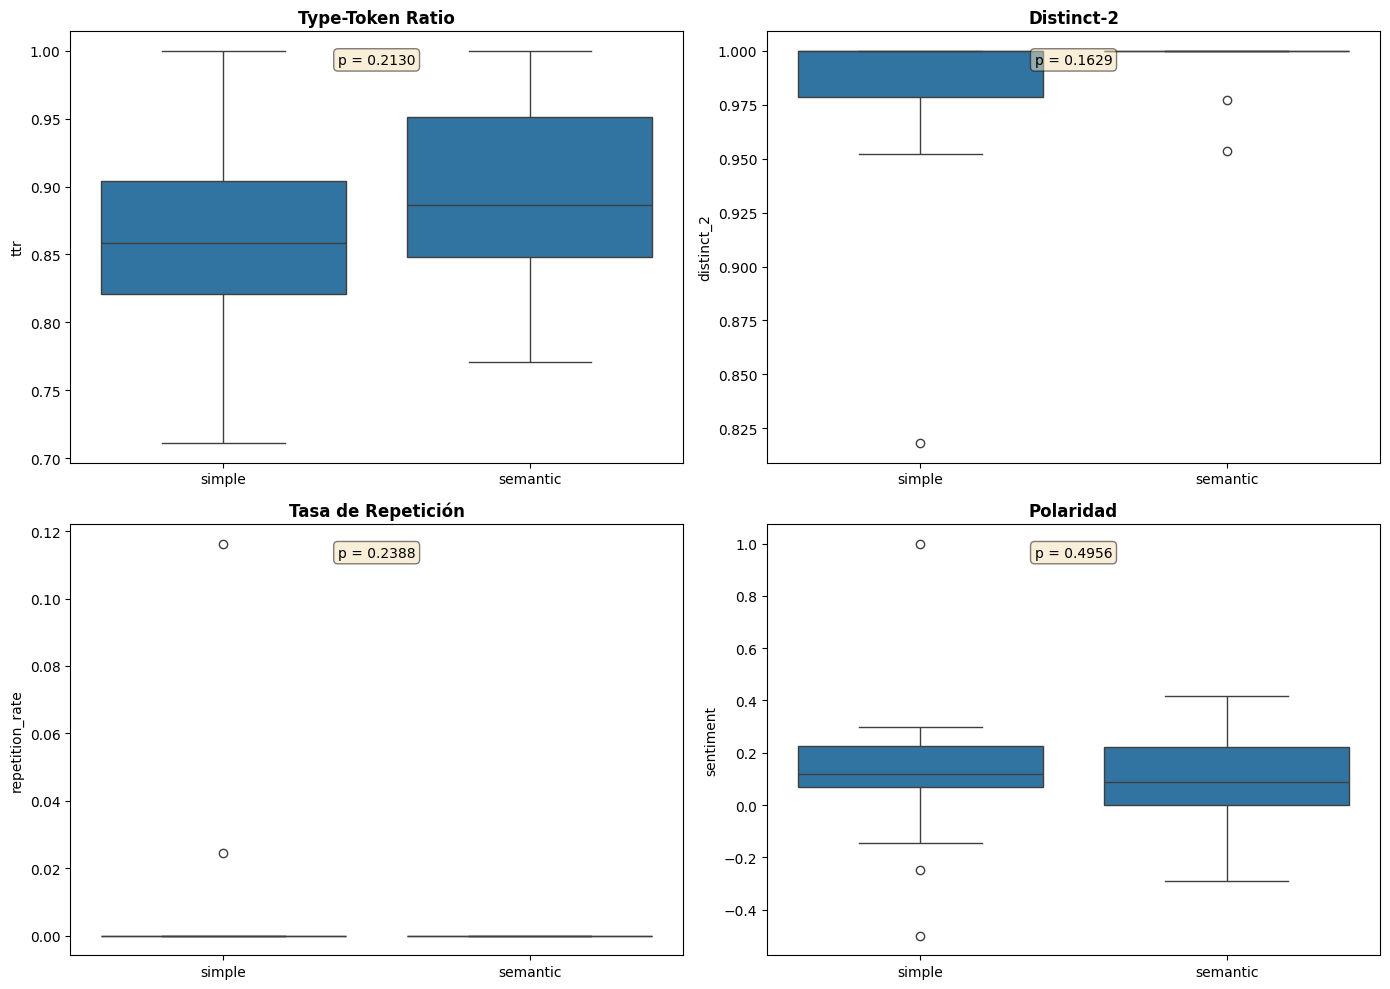


ANÁLISIS POR PROMPT

'I'm feeling anxious.':
  p = 0.3466 Diferencia no significativa

'Tell me a story.':
  p = 0.1434 Diferencia no significativa

'Explain quantum physics.':
  p = 0.1742 Diferencia no significativa

'I need support.':
  p = 0.6581 Diferencia no significativa


In [73]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

prompts_test = [
    "I'm feeling anxious.",
    "Tell me a story.",
    "Explain quantum physics.",
    "I need support."
]

results = []

print("Ejecutando análisis cuantitativo mejorado...")
print("(Entre 3 y 5 minutos dependiendo de número de repeticiones y tokens)")

for prompt in prompts_test:
    # Generar con sesgo simple
    for i in range(5):  # 5, 10 o 15
        text = model.generate_with_hormones(
            prompt,
            HORMONE_PROFILES["empathic"],
            max_new_tokens=50  # 50 o 100
        )[0]

        metrics = TextMetrics.compute_all(text)

        results.append({
            'prompt': prompt,
            'condition': 'simple',
            'ttr': len(set(text.split())) / len(text.split()),  # TTR
            'distinct_2': metrics['distinct_2'],
            'repetition_rate': metrics['repetition_rate'],
            'sentiment': metrics['sentiment_polarity']
        })

    # Generar con sesgo semántico
    for i in range(5):  # 5, 10 o 15
        text = model.generate_with_semantic_bias(
            prompt,
            HORMONE_PROFILES["empathic"],
            semantic_category="empathy",
            semantic_strength=0.5,
            max_new_tokens=50  # 50 o 100
        )[0]

        metrics = TextMetrics.compute_all(text)

        results.append({
            'prompt': prompt,
            'condition': 'semantic',
            'ttr': len(set(text.split())) / len(text.split()),
            'distinct_2': metrics['distinct_2'],
            'repetition_rate': metrics['repetition_rate'],
            'sentiment': metrics['sentiment_polarity']
        })

df_results = pd.DataFrame(results)

# Comparación estadística
print("\n" + "="*70)
print("RESULTADOS AGREGADOS")
print("="*70)

summary = df_results.groupby('condition').agg({
    'ttr': ['mean', 'std'],
    'distinct_2': ['mean', 'std'],
    'repetition_rate': ['mean', 'std'],
    'sentiment': ['mean', 'std']
}).round(4)

print(summary)

# Tests estadísticos para todas las métricas
print("\n" + "="*70)
print("TESTS ESTADÍSTICOS")
print("="*70)

for metric in ['ttr', 'distinct_2', 'repetition_rate', 'sentiment']:
    simple = df_results[df_results['condition'] == 'simple'][metric]
    semantic = df_results[df_results['condition'] == 'semantic'][metric]

    t_stat, p_value = stats.ttest_ind(simple, semantic)

    # Calcular tamaño del efecto (Cohen's d)
    pooled_std = np.sqrt((simple.std()**2 + semantic.std()**2) / 2)
    cohens_d = (semantic.mean() - simple.mean()) / pooled_std

    print(f"\n{metric.upper()}:")
    print(f"  Simple:    {simple.mean():.4f} ± {simple.std():.4f}")
    print(f"  Semántico: {semantic.mean():.4f} ± {semantic.std():.4f}")
    print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")
    print(f"  Cohen's d = {cohens_d:.3f}", end="")

    if p_value < 0.05:
        print(f" SIGNIFICATIVO")
    else:
        print(f" No significativo")

# Visualizar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics_to_plot = ['ttr', 'distinct_2', 'repetition_rate', 'sentiment']
titles = ['Type-Token Ratio', 'Distinct-2', 'Tasa de Repetición', 'Polaridad']

for ax, metric, title in zip(axes.flat, metrics_to_plot, titles):
    sns.boxplot(data=df_results, x='condition', y=metric, ax=ax)
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylabel(metric)
    ax.set_xlabel('')

    # p-value
    simple = df_results[df_results['condition'] == 'simple'][metric]
    semantic = df_results[df_results['condition'] == 'semantic'][metric]
    _, p = stats.ttest_ind(simple, semantic)

    ax.text(0.5, 0.95, f'p = {p:.4f}',
            transform=ax.transAxes,
            ha='center', va='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# Análisis post-hoc: por prompt
print("\n" + "="*70)
print("ANÁLISIS POR PROMPT")
print("="*70)

for prompt in prompts_test:
    df_prompt = df_results[df_results['prompt'] == prompt]
    simple_d2 = df_prompt[df_prompt['condition'] == 'simple']['distinct_2']
    semantic_d2 = df_prompt[df_prompt['condition'] == 'semantic']['distinct_2']

    if len(simple_d2) > 0 and len(semantic_d2) > 0:
        t, p = stats.ttest_ind(simple_d2, semantic_d2)
        print(f"\n'{prompt}':")
        print(f"  p = {p:.4f} {'Diferenecia significativa' if p < 0.05 else 'Diferencia no significativa'}")

In [74]:
# T-test de una cola
t_stat, p_value_one_tail = stats.ttest_ind(
    simple_d2, semantic_d2,
    alternative='less'  # H1: simple < semantic
)

print(f"T-test (una cola):")
print(f"  t = {t_stat:.3f}, p = {p_value_one_tail:.4f}")

T-test (una cola):
  t = -0.459, p = 0.3291


In [75]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U (alternativa robusta a t-test)
simple_d2 = df_results[df_results['condition'] == 'simple']['distinct_2']
semantic_d2 = df_results[df_results['condition'] == 'semantic']['distinct_2']

u_stat, p_value_mw = mannwhitneyu(simple_d2, semantic_d2, alternative='less')
print(f"\nMann-Whitney U test:")
print(f"  U = {u_stat:.1f}, p = {p_value_mw:.4f}")

if p_value_mw < 0.05:
    print("Semántico > Simple (SIGNIFICATIVO)")


Mann-Whitney U test:
  U = 158.5, p = 0.0562


In [76]:
# Comparar desviaciones estándar
from scipy.stats import levene

_, p_levene = levene(simple_d2, semantic_d2)

print(f"\nTest de Levene (igualdad de varianzas):")
print(f"  p = {p_levene:.4f}")

if p_levene < 0.05:
    print("Varianzas SIGNIFICATIVAMENTE diferentes")
    print("El sesgo semántico produce resultados más CONSISTENTES")


Test de Levene (igualdad de varianzas):
  p = 0.1629


##11. Conclusión de lo hecho

- Usar sesgos semánticos basados en embeddings  
- Comparar sesgo simple vs semántico  
- Analizar activación semántica  
- Explorar categorías predefinidas  
- Crear categorías custom  
- Realizar análisis cuantitativo  

Dado que este análisis constituye una demostración preliminar del enfoque y no el experimento completo con tamaño muestral adecuado, los resultados no alcanzan significancia estadística robusta, aunque las tendencias observadas (d=0.45, p=0.16) sugieren la dirección del efecto esperado.


### Consideraciones

- Costo computacional moderado (embeddings en GPU)
- Requiere `sentence-transformers` instalado
- Mejor para tareas con objetivos semánticos claros

### Próximos Pasos

- **Notebook 04:** Sistema dinámico (hormonas que se adaptan)